## Movies Released
Dataset from Kaggle.com

### Questions:
1. What is the most expensive movie?
2. Which company spent much in movie production?
3. What is the average profit generated during the period?
4. How does this profit vary in relation to the country, and movie category?
5. Is there any significant relationship between movie expendutre and revenue?

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
# Load data

path = ('Datasets/movies.csv')

movies = pd.read_csv(path)

# View first 3 rows

movies.head(3)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [3]:
# Show the number of observations and variables in the dataset

print('Then shape of the data is:', movies.shape)


Then shape of the data is: (7668, 15)


In [4]:
# Check data types

print('Data types summary:')

movies.dtypes


Data types summary:


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Show total missing values in variables/columns

print('Summary of missing values:')

movies.isna().sum()


Summary of missing values:


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
# Check for duplicates

print('The total duplicate in the dataset is:', movies.duplicated().sum())

The total duplicate in the dataset is: 0


In [7]:
# Clean the data

# remove observations with missing values

cleaned_movies = movies.dropna(axis=0, how='any')

print('All missing values removed:')

cleaned_movies.isna().sum()


All missing values removed:


name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

### 1. What is the most expensive movie?

In [8]:
# Show the most expensive movie

exp_movie = cleaned_movies.sort_values('budget', ascending=False)

# view the top 3 movies

exp_movie.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0


### 2. Which company invested the most in movie production?

In [9]:
# Show the top 5 movie prodution companies

cleaned_movies.groupby('company')['budget'].sum().sort_values(ascending=False).head()

company
Warner Bros.             1.950330e+10
Universal Pictures       1.598973e+10
Columbia Pictures        1.551211e+10
Paramount Pictures       1.372345e+10
Twentieth Century Fox    1.147460e+10
Name: budget, dtype: float64

### 3. What was the average profit earned over the period?

In [10]:
# Create a new variable and name it 'profit'

cleaned_movies['profit'] = cleaned_movies['gross'] - cleaned_movies['budget']


# View the average profit

print("Average profits generated:",cleaned_movies['profit'].mean())


Average profits generated: 67220482.86312489


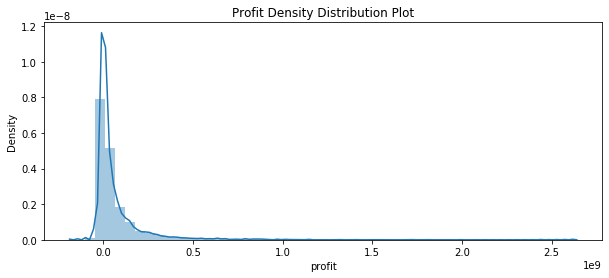

In [11]:
# View profit distribution

plt.figure(figsize=(10,4))

plt.title("Profit Density Distribution Plot")

plt.ylabel("Density")

sns.distplot(cleaned_movies['profit'])

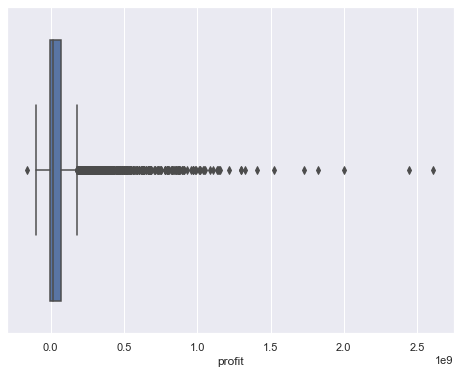

In [12]:
# view outliers

sns.set(rc={"figure.figsize":(8,6)})

sns.boxplot(cleaned_movies['profit'])

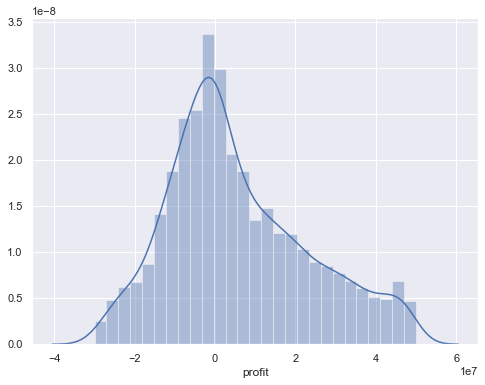

In [13]:
# create new dataframe

# remove outliers


df = cleaned_movies[cleaned_movies['profit']< 50000000]

df2 = cleaned_movies[cleaned_movies['profit']>-30000000]


# new merged dataframe

new_merged_movies = pd.merge(df, df2)


# plot new distribution curve

sns.distplot(new_merged_movies['profit'])


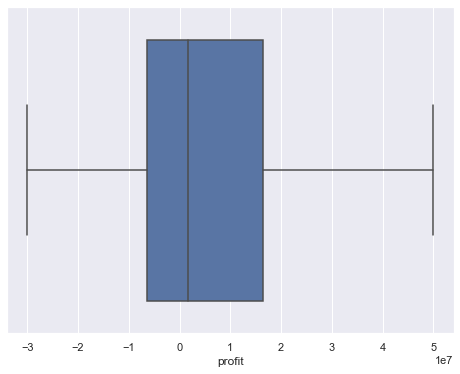

In [14]:
# view merged data distribution without outliers

sns.boxplot(new_merged_movies['profit'])

In [16]:
# show revised average profit

print("With outliers removed, the new average profit is:",new_merged_movies['profit'].mean())

With outliers removed, the new average profit is: 5770906.726817043


### 4. How does the average profits vary by country?

In [17]:
# Group profit by country

country_mean_profit = cleaned_movies.groupby('country')['profit'].mean()

# Show top 5

country_mean_profit.sort_values(ascending=False).head()

country
Malta           2.977941e+08
New Zealand     2.865697e+08
Finland         1.810630e+08
China           1.715200e+08
South Africa    9.570221e+07
Name: profit, dtype: float64

### 5. What is the variation  in profits by different movie categories?

In [18]:
# Look at profit distribution by movie category

genre_mean_profit = cleaned_movies.groupby('genre')['profit'].mean()

genre_mean_profit.sort_values(ascending=False)

genre
Family       4.674581e+08
Animation    2.047810e+08
Action       1.095547e+08
Adventure    8.730933e+07
Mystery      8.601126e+07
Horror       4.338242e+07
Drama        3.712726e+07
Comedy       3.636529e+07
Biography    3.595361e+07
Thriller     2.974528e+07
Crime        2.756668e+07
Fantasy      2.265431e+07
Sci-Fi       1.319344e+07
Romance      9.535381e+06
Western     -4.870570e+05
Name: profit, dtype: float64

### 6. Is there any significant relationship between expediture and revenue?

In [19]:
# show correlation matrix for all numeric variables

print("Pearson's Correlation Matrix:")

corr_matrix = cleaned_movies.corr(method='pearson')

corr_matrix

Pearson's Correlation Matrix:


,year,score,votes,budget,gross,runtime,profit
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.237456
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.243340
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.609203
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.610530
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.984428
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.241554
profit,0.237456,0.243340,0.609203,0.610530,0.984428,0.241554,1.000000


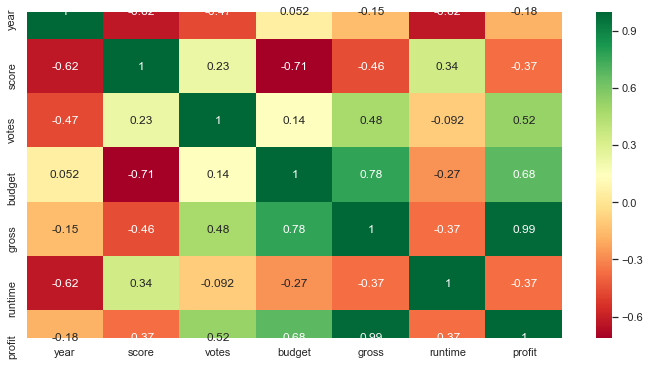

In [20]:
# Plot correlation chart

plt.figure(figsize=(12,6))

sns.heatmap(corr_matrix.corr(),cmap="RdYlGn",annot=True)


Text(0.5, 1.0, ' Budget vs. Gross Plot')

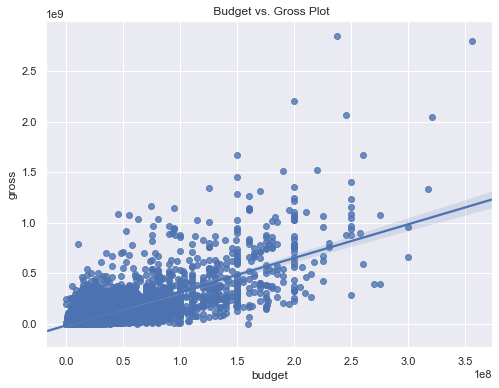

In [21]:
# show scatter plot 

sns.set(rc={"figure.figsize":(8,6)})

sns.regplot(x='budget', y='gross', data=cleaned_movies)

plt.title(" Budget vs. Gross Plot")

### Insights
There is a strong positive relationship between budget expenditure and gross revenues earned.